In [1]:
import sys,os,copy,glob
import numpy as np
sys.path.append(os.path.abspath('../smodels'))
sys.path.append(os.path.abspath('../protomodels'))
from builder.protomodel import ProtoModel
from builder.manipulator import Manipulator
from tester.predictor import Predictor
from tester.combiner import Combiner
from walker.hiscore import Hiscore
from smodels.experiment.databaseObj import Database
from smodels.tools import runtime
from smodels.tools.physicsUnits import fb
runtime._experimental = True
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() #Set style
sns.set_style('ticks',{'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
sns.set_palette(sns.color_palette("Paired"))

In [2]:
def getLikelihoods(protomodel,muvals,normalize=True):
    
    #Sort tpList
    critic = sorted(protomodel.tpList, key = lambda tp: tp[0], reverse = True)[0][2]

    #Combiner likelihood:
    combiner = Combiner(0)
    llhComb = np.array([combiner.getCombinedLikelihood(protomodel.bestCombo,mu) for mu in muvals])
    llhCombSM = combiner.getCombinedLikelihood(protomodel.bestCombo,0.)
    llhDict = {'Combined' : llhComb}
    llhDictSM = {'Combined' : llhCombSM}
    for tp in protomodel.bestCombo:
        llhDict[tp.expResult.globalInfo.id] = np.array([tp.getLikelihood(mu) for mu in muvals])
        llhDictSM[tp.expResult.globalInfo.id] = tp.getLikelihood(0.0)

    #Critic likelihood:
    if critic.getLikelihood(1.0) is not None:
        llhDictSM['Critic'] = critic.getLikelihood(0.0)
        llhDict['Critic'] = np.array([critic.getLikelihood(mu) for mu in muvals])
    else:
        llhDict['Critic'] = None
        llhDictSM['Critic'] = None
    llhDict['SM values'] = llhDictSM
    
    #Compute normalizations:
    if normalize:
        for key,llhd in llhDict.items():
            if key != 'SM values':
                norm = llhd.sum()
                llhDict[key] = llhd/norm
                llhDict['SM values'][key] *= 1/norm
    
    
    return llhDict


In [3]:
def fromDict(inputDict):
    
    p = ProtoModel(walkerid=0)
    for key,v in inputDict.items():
        setattr(p,key,copy.deepcopy(v))
        
    return p

In [4]:
#Get highest score from each run:
protomodelsDict = {}
for ff in glob.glob('../highestScores/real_run/real*.dict'):
    with open(ff,'r') as f:
        pList = eval(f.read())
    run = eval(os.path.basename(ff).replace('real','').replace('.dict',''))
    pList = [fromDict(pDict) for pDict in pList[:]]
    p = sorted(pList, key = lambda p: p.K, reverse=True)[0]
    protomodelsDict[run] = p  

In [5]:
for run in sorted(protomodelsDict.keys()):
    print(run,protomodelsDict[run])    

1 ProtoModel (XZ1,Xd,Xt): K = 6.57, Z = 3.18
2 ProtoModel (XZ1,Xc,Xt): K = 6.74, Z = 3.20
3 ProtoModel (XZ1,Xd,Xt): K = 7.53, Z = 3.33
4 ProtoModel (XZ1,Xt,Xc): K = 6.33, Z = 3.14
5 ProtoModel (XZ1,Xd,Xt): K = 6.63, Z = 3.19


In [6]:
protomodel = protomodelsDict[3]

In [7]:
#Compute predictions and contributions for each model:
for run in protomodelsDict:
    if run != 3: continue
    p = protomodelsDict[run]
    m = Manipulator(p)
    #Get predictions:
    pred = Predictor(walkerid=0,dbpath='../official124_smodels200.pcl')
    res = pred.predict(p)
    #Get contributions
    hi = Hiscore(walkerid=0,save_hiscores=False,predictor=pred)   
    hi.computeParticleContributions(m)
    hi.computeAnalysisContributions(m)    

Skipping result for: ATLAS-SUSY-2016-07
Skipping result for: ATLAS-SUSY-2016-07
Skipping result for: ATLAS-SUSY-2016-15
Skipping result for: ATLAS-SUSY-2016-15
Skipping result for: ATLAS-SUSY-2016-16
Skipping result for: ATLAS-SUSY-2016-16
Skipping result for: ATLAS-SUSY-2016-17
Skipping result for: ATLAS-SUSY-2016-17
Skipping result for: CMS-SUS-17-001
Skipping result for: CMS-SUS-17-001
Skipping result for: ATLAS-SUSY-2013-02
Skipping result for: ATLAS-SUSY-2013-02
Skipping result for: CMS-SUS-13-004
Skipping result for: CMS-SUS-13-004


Skipping result for: CMS-SUS-13-019
Skipping result for: CMS-SUS-13-019
Skipping result for: CMS-SUS-13-019
Skipping result for: CMS-SUS-13-019
[combine:0] selected predictions down via SRs from 262 to 19.
[combine:0] sorting out subsets, reduced 2788 -> 288 combinations.


combination #288/288 100%|||||||||||||||||||||||||||||||||||||||||Time: 0:00:19


Skipping result for: ATLAS-SUSY-2016-07
Skipping result for: ATLAS-SUSY-2016-07
Skipping result for: ATLAS-SUSY-2016-15
Skipping result for: ATLAS-SUSY-2016-15
Skipping result for: ATLAS-SUSY-2016-16
Skipping result for: ATLAS-SUSY-2016-16
Skipping result for: ATLAS-SUSY-2016-17
Skipping result for: ATLAS-SUSY-2016-17
Skipping result for: CMS-SUS-17-001
Skipping result for: CMS-SUS-17-001
Skipping result for: ATLAS-SUSY-2013-02
Skipping result for: ATLAS-SUSY-2013-02
Skipping result for: CMS-SUS-13-004
Skipping result for: CMS-SUS-13-004


Skipping result for: CMS-SUS-13-019
Skipping result for: CMS-SUS-13-019
Skipping result for: CMS-SUS-13-019
Skipping result for: CMS-SUS-13-019
[combine:0] selected predictions down via SRs from 262 to 19.
[combine:0] sorting out subsets, reduced 2788 -> 288 combinations.


combination #288/288 100%|||||||||||||||||||||||||||||||||||||||||Time: 0:00:20


[hiscore:0] computing contribution of Xd (963.9): [1/2]
Skipping result for: ATLAS-SUSY-2016-15
Skipping result for: ATLAS-SUSY-2016-15
Skipping result for: ATLAS-SUSY-2016-16
Skipping result for: ATLAS-SUSY-2016-16
Skipping result for: ATLAS-SUSY-2016-17
Skipping result for: ATLAS-SUSY-2016-17
Skipping result for: CMS-SUS-17-001
Skipping result for: CMS-SUS-17-001
Skipping result for: CMS-SUS-13-004
Skipping result for: CMS-SUS-13-004


Skipping result for: CMS-SUS-13-019
Skipping result for: CMS-SUS-13-019
[combine:0] selected predictions down via SRs from 164 to 14.
[combine:0] sorting out subsets, reduced 201 -> 48 combinations.


combination #48/48 100%|||||||||||||||||||||||||||||||||||||||||||Time: 0:00:02


[hiscore:0] when removing Xd, K changed: 7.536 -> 4.653 (-38.2%), Z: 3.330 -> 2.627 (100000 evts)
[hiscore:0] computing contribution of Xt (796.1): [2/2]
Skipping result for: ATLAS-SUSY-2016-07
Skipping result for: ATLAS-SUSY-2016-07
Skipping result for: ATLAS-SUSY-2013-02
Skipping result for: ATLAS-SUSY-2013-02


Skipping result for: CMS-SUS-13-019
Skipping result for: CMS-SUS-13-019
[combine:0] selected predictions down via SRs from 192 to 10.
[combine:0] sorting out subsets, reduced 109 -> 24 combinations.


combination #24/24 100%|||||||||||||||||||||||||||||||||||||||||||Time: 0:00:01


[hiscore:0] when removing Xt, K changed: 7.536 -> 2.455 (-67.4%), Z: 3.330 -> 2.243 (100000 evts)
[hiscore:0] stored 2 particle contributions
[hiscore:0] Now computing analysis contributions
[hiscore:0] Recompute the score. Old one at K=7.54, Z=3.33
[hiscore:0] stored 6 analyses contributions


In [14]:
for run in sorted(protomodelsDict.keys()):
    if run != 3: continue
    p = protomodelsDict[run]
    print('\n run %i: K = %1.2f, Z = %1.2f, muhat = %1.2f, mumax = %1.2f' %(run,p.K,p.Z,p.muhat,p.mumax))
    print('\t Best Combo:')
    for tp in sorted(p.bestCombo, key = lambda tp: tp.expResult.globalInfo.id):
        if tp.dataset.dataInfo.dataType == 'efficiencyMap':
            print('\t\t',tp.expResult.globalInfo.id,tp.txnames,tp.dataset.dataInfo.dataId,
              tp.dataset.dataInfo.observedN,tp.dataset.dataInfo.expectedBG,tp.dataset.dataInfo.bgError)
            print('\t\t  prediction = %1.2f' %(tp.xsection.value*tp.expResult.globalInfo.lumi))
        else:
            print('\t\t',tp.expResult.globalInfo.id,tp.txnames,tp.getUpperLimit(),tp.getUpperLimit(expected=True))
            print('\t\t  prediction = ',tp.xsection.value.asNumber(fb)*fb)
    print('\t Constraints:')
    for tp in sorted(p.tpList, key = lambda x: x[0], reverse=True):
        if tp[0] < 0.5: continue
        print('\t\t r = %1.2f\n' %tp[0],tp[2].expResult.globalInfo.id,tp[2].dataset.dataInfo.dataType,tp[2].txnames,
              'theory xsec =  %1.2f, UL = %s, UL_exp = %s\n' 
              %(tp[2].xsection.value.asNumber(fb),tp[2].getUpperLimit(),tp[2].getUpperLimit(expected=True)))
    print('\t Particle Contributions:')
    for pid,cont in p.particleContributions.items():
        print('\t\t',pid,cont)

    print('\t Analysis Contributions:')
    for ana,cont in p.analysisContributions.items():
        print('\t\t',ana,cont)



 run 3: K = 7.54, Z = 3.33, muhat = 1.00, mumax = 1.03
	 Best Combo:
		 ATLAS-SUSY-2013-02 [T2] SR6jtp 6 4.9 1.6
		  prediction = 0.16
		 ATLAS-SUSY-2013-15 [T2tt] tNboost 5 3.3 0.7
		  prediction = 0.39
		 ATLAS-SUSY-2016-07 [T2] 2j_Meff_1200 611.0 526.0 31.0
		  prediction = 47.54
		 ATLAS-SUSY-2016-16 [T2tt] tN_med 50 36.3 6.6
		  prediction = 9.99
		 CMS-SUS-13-012 [T2] 2.95E+01 [fb] 1.83E+01 [fb]
		  prediction =  1.57E+00 [fb]
		 CMS-SUS-16-050 [T2tt] 1.06E+02 [fb] 4.93E+01 [fb]
		  prediction =  2.87E+01 [fb]
	 Constraints:
		 r = 1.30
 CMS-SUS-19-006 upperLimit [T2tt] theory xsec =  28.69, UL = 2.22E+01 [fb], UL_exp = 3.44E+01 [fb]

		 r = 1.29
 CMS-SUS-19-006 upperLimit [T2] theory xsec =  20.90, UL = 1.62E+01 [fb], UL_exp = 1.83E+01 [fb]

		 r = 1.17
 CMS-SUS-16-033 upperLimit [T2] theory xsec =  20.90, UL = 1.78E+01 [fb], UL_exp = 2.45E+01 [fb]

		 r = 1.00
 CMS-SUS-16-049 upperLimit [T2tt] theory xsec =  28.69, UL = 2.87E+01 [fb], UL_exp = 3.95E+01 [fb]

		 r = 0.92
 CMS-S

In [9]:
protomodel = protomodelsDict[3]
muvals = np.linspace(-10,10,500)
llhDictList = []
print(protomodel)
llhDict = getLikelihoods(protomodel,muvals)

ProtoModel (XZ1,Xd,Xt): K = 7.54, Z = 3.33


In [10]:
sortedKeys = []
for key in llhDict.keys():
    if key == 'SM values' or key == 'Critic':
        continue
    else:
        sortedKeys.append((llhDict[key].max()/llhDict['SM values'][key],key))
sortedKeys = sorted(sortedKeys,reverse=True)
sortedKeys = [pt[1] for pt in sortedKeys]
print(sortedKeys)

['Combined', 'CMS-SUS-16-050', 'ATLAS-SUSY-2016-07', 'CMS-SUS-13-012', 'ATLAS-SUSY-2016-16', 'ATLAS-SUSY-2013-15', 'ATLAS-SUSY-2013-02']


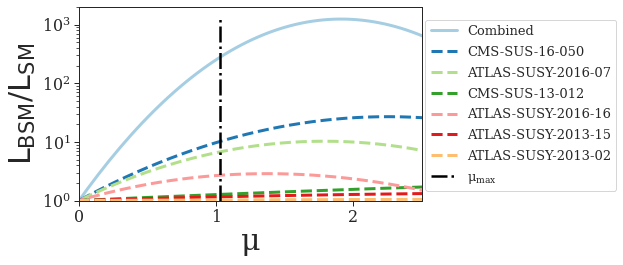

In [11]:
fig = plt.figure(figsize=(9,4))
for key in sortedKeys:
    val = llhDict[key]
    if key == 'Combined': ls = '-'
    else: ls = '--'
    plt.plot(muvals,val/llhDict['SM values'][key],label=key,linestyle=ls,linewidth=3)

plt.axvline(x=protomodel.mumax,ymax=0.95,c='black',linestyle='-.',label=r'$\mathdefault{\mu_{max}}$',
               linewidth=2.5)
# tit = r'$'
# tit += '\mathdefault{K = %1.2f}$' %(protomodel.K)
# plt.title(tit,fontsize=25)
plt.xticks(np.linspace(0,5,6))
plt.xlabel(r'$\mathdefault{\mu}$',fontsize=30)
# plt.xaxis.set_tick_params(labelsize=25)
# plt.yaxis.set_tick_params(labelsize=25)
plt.ylabel(r'$\mathdefault{\mathrm{L}_{\mathrm{BSM}}/\mathrm{L}_{\mathrm{SM}}}$',fontsize=30)
plt.legend(loc=(1.01,0.05),framealpha=1,fontsize=13,labelspacing=0.6)
plt.xlim(0,2.5)
plt.ylim(1,2e3)
plt.yscale('log')
plt.tight_layout()
plt.savefig('winner_likelihood.pdf')
plt.savefig('winner_likelihood.png')
plt.show()

In [12]:
print(protomodel.possibledecays[1000006])

[1000005, 1000022, 1000023, 1000024, 1000037, 1000021]
